<a href="https://colab.research.google.com/github/felipedoamarals/DIO_Bootcamp_Engenharia_Dados_Carrefour/blob/main/desafio_DIO_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio DIO Python e Pandas
Desafio referente ao Bootcamp de Engenharia de Dados Carrefour.
Exploração de uma base de dados com produtos vendidos.

Escopo do projeto:

O cliente solicitou a criação de um Painel de Vendas. No qual trará as seguintes visualizações:

- Valor total de venda por ano;
- Valor total de venda por loja;
- Tempo médio de entrega por loja;
- Quantidade de vendas por produto;
- Quantidade de vendas por loja;
- Quantidade de venda por marca;
- Lucro por Loja;
- 5 maiores clientes por valor de venda.

Os dados serão consumidos de uma planilha de excel extraída do sistema ERP do cliente e disponibilizada diariamente em uma pasta do google drive.

In [ ]:
# Importando bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt

## Extração de dados

In [ ]:
# Extraindo dados de uma planilha excel armazenada no Google Drive
sourcefile = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Datasets/AdventureWorks.xlsx")

In [ ]:
# Lendo as 5 primeiras linhas
sourcefile.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


## Tratamento de dados

In [ ]:
# Verificando o datatype
sourcefile.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# Verificando se temos valores nulos no dataset
sourcefile.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [ ]:
# Criando um dataset sem a coluna Fabricante
vendasdt01 = sourcefile.drop(columns=['Fabricante'])

In [ ]:
# Criando uma coluna com o custo total da Venda
vendasdt01['Custo Total da Venda'] = vendasdt01['Custo Unitário'].mul(vendasdt01['Quantidade'])

In [ ]:
# Criando uma coluna com Lucro de venda
vendasdt01['Lucro da Venda'] = (vendasdt01['Valor Venda'] - vendasdt01['Custo Total da Venda'])

In [ ]:
# Criando uma coluna com o tempo de entrega
vendasdt01['Tempo de Entrega'] = vendasdt01['Data Envio'] - vendasdt01['Data Venda']

In [ ]:
# Utilizando replace para alterar nome das Lojas
vendasdt01["ID Loja"].replace({199: "Filial 01", 306: "Filial 02", 307: "Matriz"}, inplace=True)

In [ ]:
# Alterando nome da Coluna ID Loja para Loja e atribuindo dataframe já tratado
vendas = vendasdt01.rename(columns={'ID Loja': "Loja"})

In [ ]:
vendas.dtypes

Data Venda               datetime64[ns]
Data Envio               datetime64[ns]
Loja                             object
ID Produto                        int64
ID Cliente                        int64
No. Venda                        object
Custo Unitário                  float64
Preço Unitário                  float64
Quantidade                        int64
Valor Desconto                  float64
Valor Venda                     float64
Produto                          object
Marca                            object
Classe                           object
Cor                              object
Custo Total da Venda            float64
Lucro da Venda                  float64
Tempo de Entrega        timedelta64[ns]
dtype: object

In [ ]:
vendas.sample(3)

,Data Venda,Data Envio,Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Marca,Classe,Cor,Custo Total da Venda,Lucro da Venda,Tempo de Entrega
762,2008-12-03,2008-12-10,Filial 01,2497,18893,200812035CS800,5.09,9.99,156,311.69,"1,246.75",Headphone Adapter for Contoso Phone E130 White,Contoso,Economy,White,794.04,452.71,7 days
851,2009-01-13,2009-01-18,Filial 02,1203,19061,200901134CS736,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,Fabrikam,Regular,Grey,"1,948.14","2,755.86",5 days
419,2008-12-25,2008-12-30,Matriz,1178,19111,200812254CS669,330.66,998.00,7,"1,047.90","5,938.10",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,Fabrikam,Regular,White,"2,314.62","3,623.48",5 days


## Visualização de dados

In [ ]:
# Criando um estilo padrão de gráficos
plt.style.use("seaborn")

#### Valor total de vendas por ano

Text(0, 0.5, 'Venda - mi')

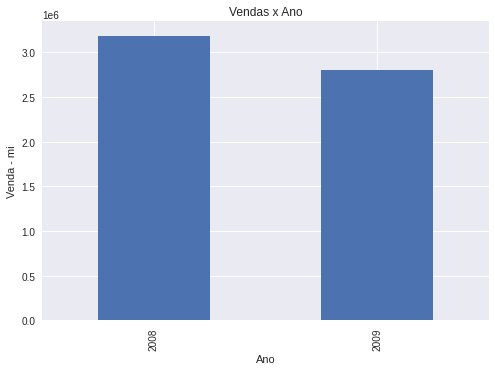

In [ ]:
# Configurando o formato float
pd.options.display.float_format = '{:20,.2f}'.format

# Realizando o Cálculo e exibindo em gráfico
vlVendasAno = vendas.groupby([vendas["Data Venda"].dt.year])['Valor Venda'].sum()
vlVendasAno.plot.bar(title="Vendas x Ano")
plt.xlabel("Ano")
plt.ylabel("Venda - mi")

#### Valor total de vendas por Loja

Text(0, 0.5, 'Venda - mi')

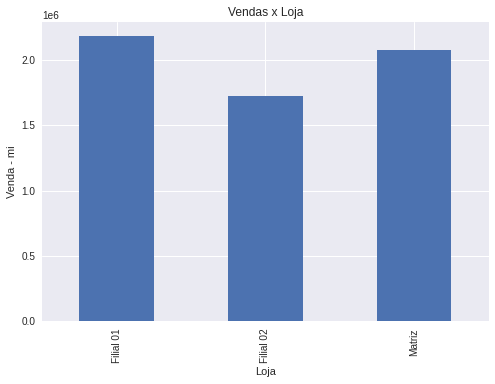

In [ ]:
# Realizando o Cálculo e exibindo em gráfico
vlVendasLoja = vendas.groupby(vendas["Loja"])['Valor Venda'].sum()
vlVendasLoja.plot.bar(title="Vendas x Loja")
plt.xlabel("Loja")
plt.ylabel("Venda - mi")

#### Tempo médio de entrega por loja

Text(0, 0.5, 'Tempo médio de entrega - Dias')

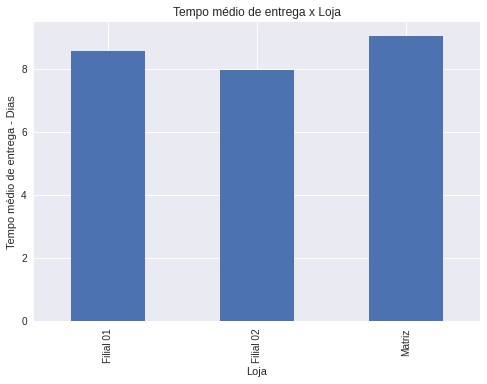

In [ ]:
# Realizando o Cálculo e exibindo em gráfico
# Extraindo apenas o dia da coluna Tempo de Entrega
vendas['Tempo de Entrega'] = (vendasdt01['Data Envio'] - vendasdt01['Data Venda']).dt.days
tpMedioEntrega = vendas.groupby(vendas["Loja"])['Tempo de Entrega'].mean()
tpMedioEntrega.plot.bar(title="Tempo médio de entrega x Loja")
plt.xlabel("Loja")
plt.ylabel("Tempo médio de entrega - Dias")

Quantidade de vendas por produto


Text(0, 0.5, 'Produto')

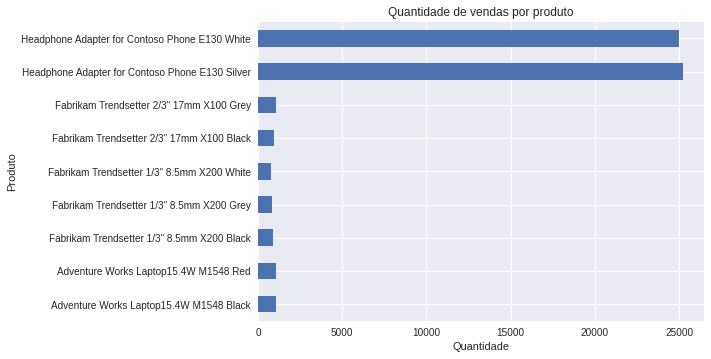

In [ ]:
qtVendasProduto = vendas.groupby(vendas["Produto"])['Quantidade'].sum()
qtVendasProduto.plot.barh(title="Quantidade de vendas por produto")
plt.xlabel("Quantidade")
plt.ylabel("Produto")

### Quantidade de vendas por loja

Text(0, 0.5, 'Loja')

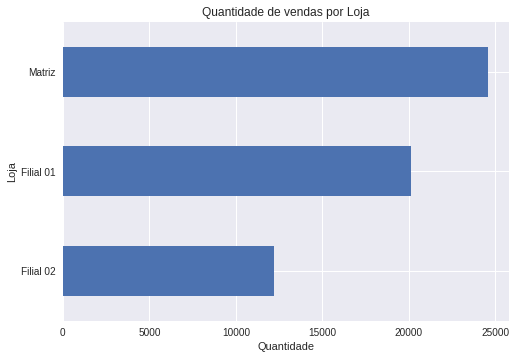

In [ ]:
qtVendasLoja = vendas.groupby(vendas["Loja"])['Quantidade'].sum().sort_values()
qtVendasLoja.plot.barh(title="Quantidade de vendas por Loja")
plt.xlabel("Quantidade")
plt.ylabel("Loja")

### Quantidade de vendas por marca

Text(0, 0.5, 'Marca')

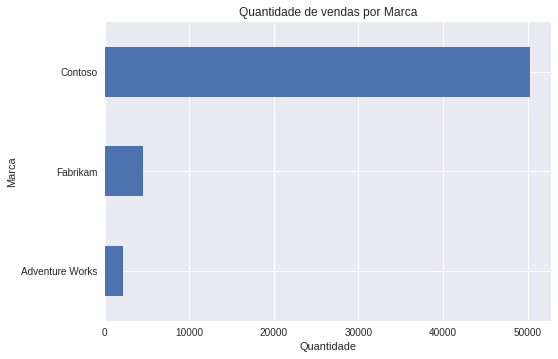

In [ ]:
qtVendasMarca = vendas.groupby(vendas["Marca"])['Quantidade'].sum().sort_values()
qtVendasMarca.plot.barh(title="Quantidade de vendas por Marca")
plt.xlabel("Quantidade")
plt.ylabel("Marca")

### Lucro por Loja

Text(0, 0.5, 'Loja')

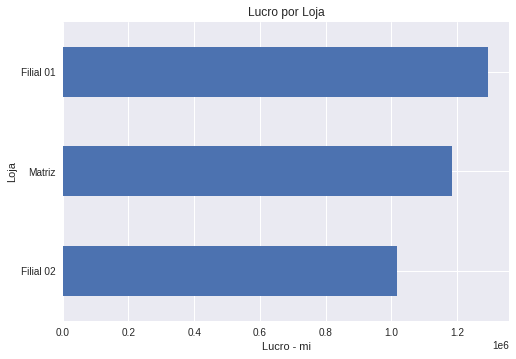

In [ ]:
lucroLoja = vendas.groupby(vendas["Loja"])['Lucro da Venda'].sum().sort_values()
lucroLoja.plot.barh(title="Lucro por Loja")
plt.xlabel("Lucro - mi")
plt.ylabel("Loja")

### 5 maiores clientes por venda

Text(0, 0.5, 'Cliente')

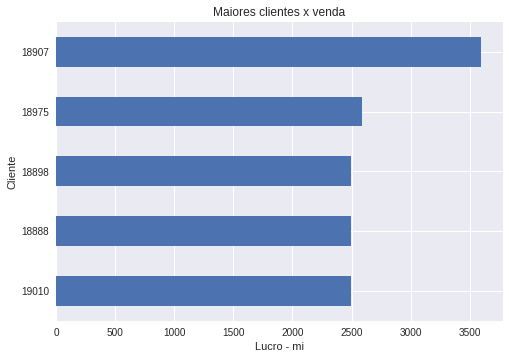

In [ ]:
maioresClientes = vendas.groupby(vendas["ID Cliente"])['Valor Venda'].sum().sort_values().head(5)
maioresClientes.plot.barh(title="Maiores clientes x venda")
plt.xlabel("Lucro - mi")
plt.ylabel("Cliente")